In [1]:
import pandas as pd
df = pd.read_csv('text_emotion.csv', encoding='latin_1')

In [2]:
df.dropna()
df.head()

,sentiment,content,Unnamed: 2
0,empty,@tiffanylue i know i was listenin to bad habi...,NaN
1,sadness,Layin n bed with a headache ughhhh...waitin o...,NaN
2,sadness,Funeral ceremony...gloomy friday...,NaN
3,enthusiasm,wants to hang out with friends SOON!,NaN
4,neutral,@dannycastillo We want to trade with someone w...,NaN


In [3]:
df_list = [df.columns.values.astype('U').tolist()] + df.values.tolist()

In [4]:
df_sentence = [df_list[x+1][1] for x in range(len(df_list)-1)]
emotion = [df_list[x+1][0] for x in range(len(df_list)-1)]
print(emotion[0:10])
print(type(emotion[0]))
print(type('empty'))
print(emotion[0] is emotion[526])
print(len(emotion))
print(df_sentence[0])

['empty', 'sadness', 'sadness', 'enthusiasm', 'neutral', 'worry', 'sadness', 'worry', 'sadness', 'sadness']
<class 'str'>
<class 'str'>
True
40000
@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[


In [5]:
mylist = list(set(emotion))
'''
if emotion[i] is emotion[147]: #relief
        valence_3[i] = 1 #for positive valence
        arousal_3[i] = 0
    if emotion[i] is emotion[4]: #neutral
        valence_3[i] = 0 #for positive valence
        arousal_3[i] = 0
    if emotion[i] is emotion[112]: #boredom
        valence_3[i] = 0 #for positive valence
        arousal_3[i] = 0
    if emotion[i] is emotion[21]: #fun
        valence_3[i] = 1 #for positive valence
        arousal_3[i] = 1
    if emotion[i] is emotion[526]: #empty
        valence_3[i] = 0 #for positive valence
        arousal_3[i] = 0
    if emotion[i] is emotion[5]: #worry
        valence_3[i] = 0 #for positive valence
        arousal_3[i] = 1
    if emotion[i] is emotion[14]: #surprise
        valence_3[i] = 1 #for positive valence
        arousal_3[i] = 1
    if emotion[i] is emotion[16]: #love
        valence_3[i] = 1 #for positive valence
        arousal_3[i] = 1
    if emotion[i] is emotion[86]:
        valence_3[i] = 0 #for positive valence
        arousal_3[i] = 1
    if emotion[i] is emotion[3]: #enthu
        valence_3[i] = 1 #for positive valence
        arousal_3[i] = 1
    if emotion[i] is emotion[1]: #sadness
        print(i)
        valence_3[i] = 0 #for positive valence
        arousal_3[i] = 0
    if emotion[i] is emotion[527]:
        valence_3[i] = 0 #for positive valence
        arousal_3[i] = 1
    else:
        valence_3[i] = 1 #for positive valence
        arousal_3[i] = 1
        '''
print(mylist)

['sadness', 'surprise', 'neutral', 'enthusiasm', 'worry', 'happiness', 'fun', 'love', 'anger', 'boredom', 'empty', 'relief', 'hate']


In [6]:
import numpy as np
valence_3 = np.zeros(len(emotion))
arousal_3 = np.zeros(len(emotion))
one_one = []
zero_zero = []
zero_one = []
one_zero = []
i = 0
j = 0
while i < int(len(emotion)):
    if(emotion[i] == 'fun' or emotion[i] == 'happiness' or emotion[i] == 'enthusiasm' or emotion[i] == 'love'):
        valence_3[j] = 1
        arousal_3[j] = 1
        one_one.append(df_sentence[i])
        j+=1
    i += 1
i = 0
while i < int(len(emotion)):
    if(emotion[i] == 'sad' or emotion[i] == 'boredom' or emotion[i] == 'worry'):
        valence_3[j] = 0
        arousal_3[j] = 0
        zero_zero.append(df_sentence[i])
        j+=1
    i += 1
i = 0
while i < int(len(emotion)):
    if(emotion[i] == 'anger' or emotion[i] == 'hate'):
        valence_3[j] = 0
        arousal_3[j] = 1
        zero_one.append(df_sentence[i])
        j+=1
    i += 1
i = 0
while i < int(len(emotion)):
    if(emotion[i] == 'neural' or emotion[i] == 'relief'):
        valence_3[j] = 1
        arousal_3[j] = 0
        one_zero.append(df_sentence[i])
        j+=1
    i+=1
print(i)

40000


In [7]:
print(len(one_one))
print(len(zero_one))
print(len(zero_zero))
print(len(one_zero))
print(len(valence_3))
print(len(arousal_3))
valence3 = np.zeros(j)
arousal3 = np.zeros(j)
for i in range(j):
    valence3[i] = valence_3[i]
    arousal3[i] = arousal_3[i]
print(len(valence3))
print(len(arousal3))
df_sentence = one_one + zero_zero + zero_one + one_zero
print(len(df_sentence))

11586
1433
8638
1526
40000
40000
23183
23183
23183


In [8]:
print(df_sentence[0])
print(valence3[0])
print(arousal3[0])

wants to hang out with friends SOON!
1.0
1.0


In [9]:
emo = pd.read_csv('emo.csv', encoding='latin_1')
emo.dropna()
#fb = pd.read_csv('fbemo.csv')
#fb.dropna()
#fb_list = [fb.columns.values.astype('U').tolist()] + fb.values.tolist()
emo_list = [emo.columns.values.astype('U').tolist()] + emo.values.tolist()

In [10]:
import numpy as np
valence_1 = np.zeros(len(emo_list)-1)
arousal_1 = np.zeros(len(emo_list)-1)
i = 1
while i < int(len(emo_list)):
    if emo_list[i][1] >= 3:
        valence_1[i-1] = 1 #for positive valence
    else:
        valence_1[i-1] = 0 #for negative valence
    if emo_list[i][2] >= 3:
        arousal_1[i-1] = 1 #for positive arousal
    else:
        arousal_1[i-1] = 0 #for negative arousal
    i+=1
'''
valence_2 = np.zeros(len(fb_list)-1)
arousal_2 = np.zeros(len(fb_list)-1)
i = 1
while i < int(len(fb_list)):
    if (fb_list[i][1] + fb_list[i][2])/2 >= 5:
        valence_2[i-1] = 1 #for positive valence
    else:
        valence_2[i-1] = 0 #for negative valence
    if (fb_list[i][3] + fb_list[i][4])/2 >= 5:
        arousal_2[i-1] = 1 #for positive arousal
    else:
        arousal_2[i-1] = 0 #for negative arousal
    i+=1
'''
print(valence_1.shape)
#print(valence_2.shape)

(10062,)


In [11]:
emo_sentence = [emo_list[x+1][0] for x in range(len(emo_list)-1)]
#fb_sentence = [fb_list[x+1][0] for x in range(len(fb_list)-1)]
#sentence = emo_sentence + fb_sentence + df_sentence

In [12]:
sentence = emo_sentence + df_sentence
valence_np = np.hstack((valence_1, valence3)) #, valence_2
arousal_np = np.hstack((arousal_1, arousal3)) #, arousal_2
valence = valence_np.tolist()
arousal = arousal_np.tolist()

In [13]:
from sklearn.model_selection import train_test_split
#S_train = [sentence[i].value().astype(U) for i in range(len(sentence))]
S_train = sentence
v_train = valence 
a_train = arousal
print(len(S_train))
print(len(v_train))
print(len(a_train))

33245
33245
33245


In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
middle_words = ['and','a','the','am','it','me','with','in','on','by','near','this','that','an','there','here','those','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once',
                'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into',
                'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves',
                'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 
                'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 
                'all', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves',
                'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'myself', 'which', 'those', 'i',
                'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
middle_words = set(dict.fromkeys([stemmer.stem(word) for word in middle_words]))

In [15]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
def tokenize(sentence):
    tokens = tokenizer.tokenize(sentence)
    for w in middle_words:
        while w in tokens:
            tokens.remove(w)
    toReturn = [stemmer.stem(item.lower()) for item in tokens]
    return toReturn

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = TfidfVectorizer(ngram_range=(1,3), tokenizer=tokenize)
trainX = count_vect.fit_transform(S_train)

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(v_train)
target_labels = le.classes_
trainy = le.transform(v_train)

In [18]:
def train_random(X,y):
    from sklearn.linear_model import RandomizedLogisticRegression
    randomized_logistic = RandomizedLogisticRegression()
    randomized_logistic.fit(X, y)
    print("Parameters: ", randomized_logistic.get_params)
    print("Score: ", str(randomized_logistic.score(X,y)))
    return randomized_logistic

def train_bagging(X,y):
    from sklearn.ensemble import BaggingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    bagging = BaggingClassifier(base_estimator = LogisticRegression(C=5, random_state=0, solver='lbfgs',class_weight = 'balanced', max_iter=10000))
    f_list = [0.25,0.5,0.75]
    parameters_bagging = {'max_features': f_list}
    grid = GridSearchCV(bagging, parameters_bagging, cv=5)
    grid.fit(X, y)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best parameters: ", grid.best_params_)
    print("Best estimator: ", grid.best_estimator_)
    cls_bagging = grid.best_estimator_
    cls_bagging.fit(X, y)
    return cls_bagging
    
def train_classifier(X, y):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    param_grid = {'C': [1, 5, 10, 25]}
    print("grid search start")
    grid = GridSearchCV(LogisticRegression(random_state=0, solver='lbfgs',class_weight = 'balanced', max_iter=10000), param_grid, cv=5)
    print("done grid search")
    grid.fit(X, y)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best parameters: ", grid.best_params_)
    print("Best estimator: ", grid.best_estimator_)
    cls = grid.best_estimator_
    cls.fit(X, y)
    return cls

In [19]:
cls_valence = train_classifier(trainX, trainy)
#svc_valence = train_svc(trainX, trainy)
#bagging_valence = train_bagging(trainX, trainy)
#cls_random = train_random_forest(trainX, trainy)

grid search start
done grid search
Best cross-validation score: 0.73
Best parameters:  {'C': 5}
Best estimator:  LogisticRegression(C=5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


In [20]:
le_a = preprocessing.LabelEncoder()
le_a.fit(a_train)
target_labels_a = le_a.classes_
trainy = le_a.transform(a_train)
le_a = preprocessing.LabelEncoder()

In [21]:
cls_arousal = train_classifier(trainX, trainy)
#bagging_arousal = train_bagging(trainX, trainy)
#random_arousal = train_random(trainX, trainy)

grid search start
done grid search
Best cross-validation score: 0.64
Best parameters:  {'C': 10}
Best estimator:  LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


In [63]:
test_list = ['The sunny sky makes me feel relaxed']
test = count_vect.transform(test_list)
lr_v = cls_valence.predict(test)
lr_a = cls_arousal.predict(test)
print(lr_v)
print(lr_a)
print()

[1]
[0]



You are just Chilling




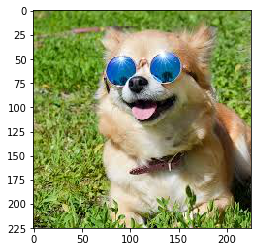

In [64]:
from matplotlib.pyplot import imshow
from PIL import Image

%matplotlib inline
if(lr_v == 1 and lr_a == 1):
    pil_im = Image.open('happy.jpeg', 'r')
    print("You are Happy")
elif(lr_v == 1 and lr_a == 0):
    pil_im = Image.open('chilling.jpeg', 'r')
    print("You are just Chilling")
elif(lr_v == 0 and lr_a == 1):
    pil_im = Image.open('angry.jpeg', 'r')
    print(" You are really displeased")
elif(lr_v == 0 and lr_a == 0):
    pil_im = Image.open('sad.jpeg', 'r')
    print("You are bored or you are sad")
imshow(np.asarray(pil_im))
print()
print()